In [11]:
import trueskill
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
import operator
import copy
import pickle
with open('ratings.pkl', 'rb') as f:
    ratings = pickle.load(f)
with open('B_students.pkl', 'rb') as f:
    B_students = pickle.load(f)
with open('all_students.pkl', 'rb') as f:
    all_students = pickle.load(f)

In [2]:
mu=25.000
sigma=8.333
beta=4.167
tau=0
draw_probability=0
trueskill.setup(mu=mu, sigma=sigma, beta=beta, tau=tau, draw_probability=draw_probability, backend=None)

trueskill.TrueSkill(mu=25.000, sigma=8.333, beta=4.167, tau=0.000, draw_probability=0.0%)

In [3]:
def win_probability(player1, player2):
    
    delta_mu = player1.mu - player2.mu
    sum_sigma = player1.sigma ** 2 + player2.sigma ** 2
    denom = math.sqrt(2 * (beta * beta) + sum_sigma)
    ts = trueskill.global_env()
    
    return ts.cdf(delta_mu / denom)

In [4]:
def select_best_student(question_rating, students):
    
    rating_difference = {}
    
    for student in students:
        rating_difference[student] = abs(question_rating.mu - ratings[student].mu)
        
    best_student = min(rating_difference.items(), key = operator.itemgetter(1))[0]

    return best_student

In [5]:
def get_match_outcome(question, student):
    
    match_outcome = ()
    
    if np.random.uniform() <= win_probability(ratings[question], ratings[student]):
        match_outcome = ('question', 'student')
    else:
        match_outcome = ('student', 'question')
    
    return match_outcome

In [6]:
def get_ratings_convergence(question, students, num_students_ans):
      
    question_rating = trueskill.Rating()
    question_rating_mu = [question_rating.mu]
    rating_difference = []
    student_bank = copy.deepcopy(students)
                
    for i in range(num_students_ans):
        
        best_student = select_best_student(question_rating, student_bank)
        student_bank.remove(best_student)
        
        rating_difference.append(abs(question_rating.mu - ratings[best_student].mu))
        
        match_outcome = get_match_outcome(question, best_student)
        
        if match_outcome[0] == 'question':
            question_rating, discard = trueskill.rate_1vs1(question_rating, ratings[best_student])
        else:
            discard, question_rating = trueskill.rate_1vs1(ratings[best_student], question_rating)
    
        question_rating_mu.append(question_rating.mu)
    
    return question_rating_mu, rating_difference

In [43]:
def plot_convergence(question, students, num_students_ans):
    
    question_rating, rating_difference = get_ratings_convergence(question, students, num_students_ans)
    num_students = list(range(len(question_rating)))
    num_students_2 = list(range(len(question_rating)-1))
    real_rating = ratings[question].mu
    
    plt.plot(num_students, question_rating, label = 'question rating')
    # plt.plot(num_students_2, rating_difference, color = 'green', label = 'difference in student and question rating')
    plt.axhline(y = real_rating, color = 'r', linestyle = '-')
    plt.xlabel('No. of students who answered the question')
    plt.ylabel('Rating of question')
    # plt.title('True mu = ' + str(ratings[question].mu))
    # plt.legend(loc = 'center')
    plt.show
    plt.savefig('graph.png')

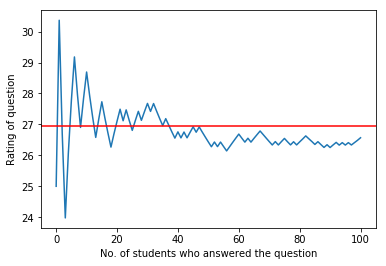

In [47]:
plot_convergence('L3C34', all_students, 100)